In [ ]:
#import libraries that needed
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [ ]:
# mount the drive in colab using this code
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# knobs for fine tuning
BATCH_SIZE = 32
EPOCHS = 20
IMG_SIZE = (224, 224)
IMG_SHAPE = (224, 224, 3)

In [ ]:
# load the zip file and unzip it
import zipfile, os

local_zip = '/content/drive/MyDrive/Dataset/7-mini.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# set the unziped file as base directory
base_dir  = '/tmp/7-mini'

NUM_OF_CLASS = len(os.listdir(base_dir))

In [ ]:
# data augmentation and splitting the data for train-test
train_datagen  = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2
)

In [ ]:
# data generator creating for train and test
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = IMG_SIZE,
    class_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    shuffle = True,
    subset = 'training'
)

test_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = IMG_SIZE,
    class_mode = 'categorical',
    color_mode = 'rgb',
    batch_size = BATCH_SIZE,
    shuffle = True,
    subset = 'validation'
)

Found 706 images belonging to 7 classes.
Found 176 images belonging to 7 classes.


In [ ]:
TRAIN_SIZE = train_generator.n
TEST_SIZE = test_generator.n

In [ ]:
# building the model from scratch
model = Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=IMG_SHAPE),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(NUM_OF_CLASS, activation='softmax')
])

In [ ]:
# compile the model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
# training time!
history = model.fit(
    train_generator,
    epochs = EPOCHS,
    steps_per_epoch = TRAIN_SIZE // BATCH_SIZE,
    validation_data = test_generator,
    validation_steps = TEST_SIZE // BATCH_SIZE
)

Epoch 1/20
22/22 [==============================] - 91s 3s/step - loss: 2.2506 - accuracy: 0.2028 - val_loss: 1.6912 - val_accuracy: 0.2250
Epoch 2/20
22/22 [==============================] - 69s 3s/step - loss: 1.6427 - accuracy: 0.2989 - val_loss: 1.5473 - val_accuracy: 0.3375
Epoch 3/20
22/22 [==============================] - 69s 3s/step - loss: 1.3529 - accuracy: 0.4639 - val_loss: 1.3392 - val_accuracy: 0.4750
Epoch 4/20
22/22 [==============================] - 69s 3s/step - loss: 1.1444 - accuracy: 0.5639 - val_loss: 1.1078 - val_accuracy: 0.6438
Epoch 5/20
22/22 [==============================] - 68s 3s/step - loss: 0.9475 - accuracy: 0.7144 - val_loss: 0.7552 - val_accuracy: 0.7625
Epoch 6/20
22/22 [==============================] - 69s 3s/step - loss: 0.6922 - accuracy: 0.7397 - val_loss: 0.8248 - val_accuracy: 0.7312
Epoch 7/20
22/22 [==============================] - 68s 3s/step - loss: 0.6964 - accuracy: 0.7858 - val_loss: 0.7730 - val_accuracy: 0.7188
Epoch 8/20
22/22 [==

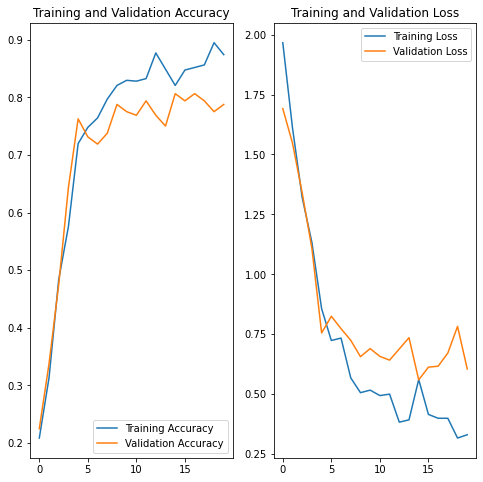

In [ ]:
# plot train-test result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving ang2.jpg to ang2 (1).jpg
ang2.jpg
Anggur


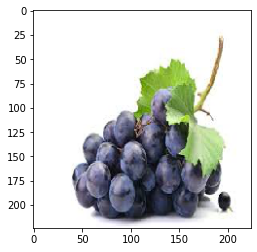

In [ ]:
# code for inputing image to validating the model
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=IMG_SIZE)
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('Anggur')
  elif classes[0][1]==1:
    print('Brokoli')
  elif classes[0][2]==1:
    print('Wortel')
  elif classes[0][3]==1:
    print('Apel')
  elif classes[0][4]==1:
    print('Jeruk')
  elif classes[0][5]==1:
    print('Pisang')
  else :
    print('Tahu')

In [ ]:
# saving the model
export_dir = 'saved_model-fromscratch'

model.save(export_dir)

INFO:tensorflow:Assets written to: saved_model-fromscratch/assets


INFO:tensorflow:Assets written to: saved_model-fromscratch/assets


In [ ]:
!zip -r /content/saved_model-fromscratch.zip /content/saved_model-fromscratch

  adding: content/saved_model-fromscratch/ (stored 0%)
  adding: content/saved_model-fromscratch/saved_model.pb (deflated 90%)
  adding: content/saved_model-fromscratch/variables/ (stored 0%)
  adding: content/saved_model-fromscratch/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/saved_model-fromscratch/variables/variables.index (deflated 67%)
  adding: content/saved_model-fromscratch/keras_metadata.pb (deflated 86%)
  adding: content/saved_model-fromscratch/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download("/content/saved_model-fromscratch.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>